# ANN on mnist data (tensorflow)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.metrics import classification_report, accuracy_score

In [3]:
(X_train, y_train), ( X_test, y_test) =  keras.datasets.mnist.load_data()

In [4]:
print('X train :', len(X_train), 'X test :',len(X_test))
print('y train :', len(y_train), 'y test :',len(y_test))

X train : 60000 X test : 10000
y train : 60000 y test : 10000


In [5]:
print('X train :', X_train.shape, 'X test :', X_test.shape)
print('y train :', y_train.shape, 'y test :',y_test.shape)

X train : (60000, 28, 28) X test : (10000, 28, 28)
y train : (60000,) y test : (10000,)


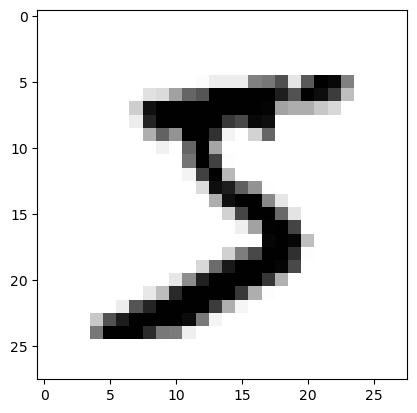

In [6]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [7]:
print(y_train[0])

5


In [28]:
#normalization scaling
X_train = X_train/255
X_test = X_test/255

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'sparse_categorical_crossentropy')


model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 1.2655 - accuracy: 0.7068
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5283 - accuracy: 0.8676
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4016 - accuracy: 0.8913
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3538 - accuracy: 0.9013
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3279 - accuracy: 0.9075
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3100 - accuracy: 0.9116
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2964 - accuracy: 0.9152
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2851 - accuracy: 0.9185
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2749 - accuracy: 0.9213
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step

In [38]:
y_pred = pd.DataFrame(model.predict(X_test))#
y_pred = y_pred.idxmax(axis = 1)
y_pred

313/313 [==============================] - 1s 5ms/step


0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: int64

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 120)               94200     
                                                                 
 dense_11 (Dense)            (None, 10)                1210      
                                                                 
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

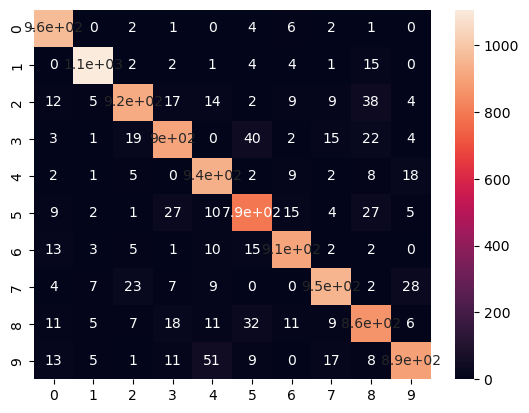

In [45]:
cm = tf.math.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

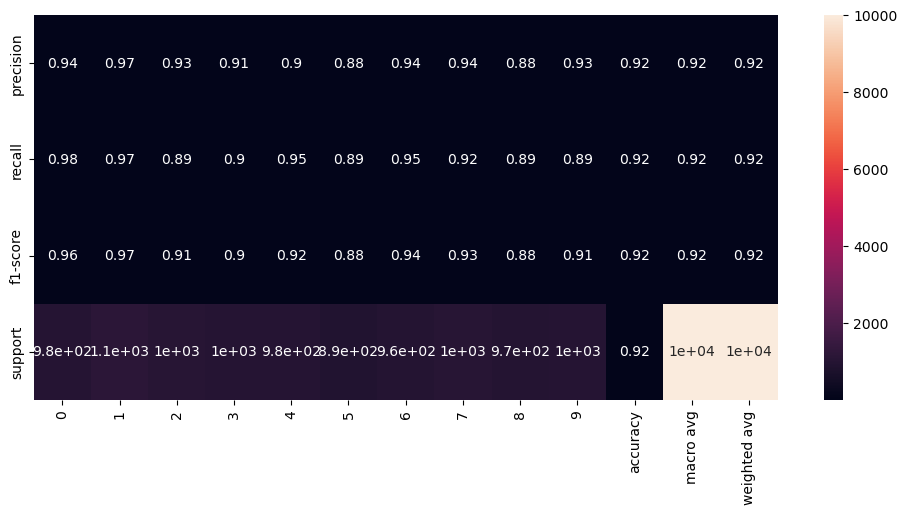

In [55]:
cr = classification_report(y_test, y_pred, output_dict = True)

plt.figure(figsize=(12, 5))
sns.heatmap(pd.DataFrame(cr), annot=True)

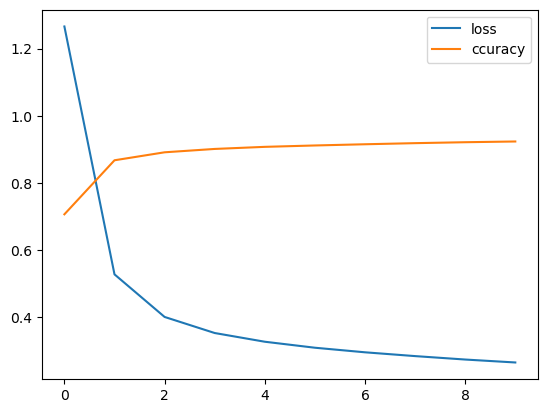

In [89]:
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.legend()

In [90]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.2582 - accuracy: 0.9270


[0.2582079768180847, 0.9269999861717224]